#Criando um Modelo inicial

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [3]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [4]:
dados['inadimplente']

,inadimplente
0,0
1,0
2,0
3,0
4,0
...,...
54020,1
54021,1
54022,1
54023,1


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      54025 non-null  float64
 1   anuidade_emprestimo  54025 non-null  float64
 2   anos_casa_propria    54025 non-null  float64
 3   telefone_trab        54025 non-null  int64  
 4   avaliacao_cidade     54025 non-null  float64
 5   score_1              54025 non-null  float64
 6   score_2              54025 non-null  float64
 7   score_3              54025 non-null  float64
 8   score_social         54025 non-null  float64
 9   troca_telefone       54025 non-null  float64
 10  inadimplente         54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


In [ ]:
#A base de dados já está totalmente tratada

In [6]:
x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

In [7]:
x

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000
...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000


In [8]:
#Iremos utilizar árvore de decisão
from sklearn.tree import DecisionTreeClassifier

In [9]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)

DecisionTreeClassifier()

In [10]:
modelo.score(x,y)

1.0

In [12]:
print(f'Acurácia: {modelo.score(x,y)*100}%')

Acurácia: 100.0%


Resultado enganoso, precisamos distribuir os dados entre treino e teste

##Validando o modelo

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x, x_teste, y, y_teste = train_test_split(x, y,test_size=0.15, stratify=y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify=y, random_state = 5)


In [15]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino:{modelo.score(x_treino, y_treino)*100}%')
print(f'Acurácia de validacão:{modelo.score(x_val, y_val)*100}%')

Acurácia de treino:100.0%
Acurácia de validacão:84.94033620764742%


Desempenho caindo de forma drástica, acabou errando muito nos dados de validação (dados que ele não viu)

In [16]:
#Iremos usar o parâmetro de max depth
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino:{modelo.score(x_treino, y_treino)*100}%')
print(f'Acurácia de validacão:{modelo.score(x_val, y_val)*100}%')

Acurácia de treino:91.26887340301974%
Acurácia de validacão:91.27253723543245%


É possível ver uma melhoria em relação ao padrão dos dados.Agora iremos avaliar o modelo de forma mais específica para cada uma das classes!

##Avaliando o modelo

In [17]:
#Aqui iremos aprender sobre a matriz de confusão

from sklearn.metrics import confusion_matrix

In [18]:
y_previsto = modelo.predict(x_val)
matriz_confusao  = confusion_matrix(y_val, y_previsto)
matriz_confusao

array([[10479,     0],
       [ 1002,     0]])

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

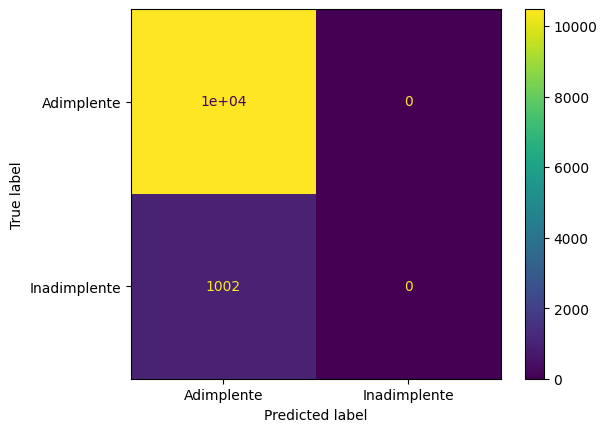

In [21]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();
# 0 = Clientes que pagam as contas em dia
# 1 = Inadimplentes

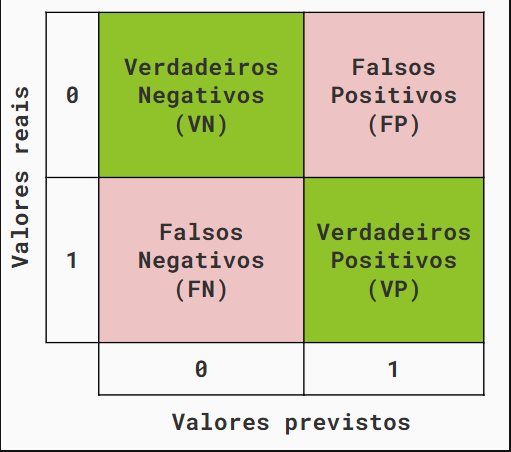

##Utilizando o Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier


In [23]:
modelo_ex = RandomForestClassifier(max_depth=5, random_state=5)
modelo_ex.fit(x_treino, y_treino)
print(f'Acurácia de treino:{modelo_ex.score(x_treino, y_treino)*100}%')
print(f'Acurácia de validacão:{modelo_ex.score(x_val, y_val)*100}%')

Acurácia de treino:91.26887340301974%
Acurácia de validacão:91.27253723543245%


In [24]:
y_previsto_ex = modelo_ex.predict(x_val)

In [25]:
matriz_confusao_ex = confusion_matrix(y_val, y_previsto_ex)
matriz_confusao_ex

array([[10479,     0],
       [ 1002,     0]])

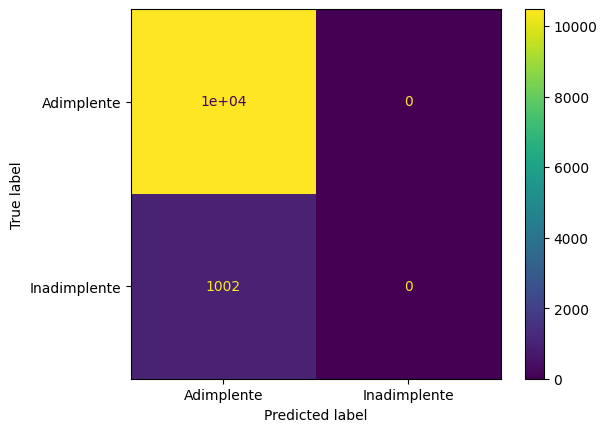

In [27]:
visualizacao = ConfusionMatrixDisplay(matriz_confusao_ex,display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot()

Com base nos resultados, conseguimos ver que os modelos de árvore de decisão não conseguem classificar nenhum cliente como inadimplente, mostrando uma terrível eficiência.

##Acurácia, Precisão e Recall

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)*100}%')

Acurácia: 91.27253723543245%


In [31]:
from sklearn.metrics import precision_score, recall_score


In [32]:
print(f'Precisão: {precision_score(y_val, y_previsto)*100}%')
print(f'Recall: {recall_score(y_val, y_previsto)*100}%')

Precisão: 0.0%
Recall: 0.0%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
from sklearn.metrics import f1_score

In [34]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.0


Revocação (recall)
Mede a proporção de dados positivos que foram corretamente identificados pelo modelo, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados positivos como negativos. É usada quando o risco ou custo de classificar falsos negativos é alto. Por exemplo, em casos de diagnóstico de doenças graves, em que é fundamental detectar corretamente a presença da doença.

Precisão
Mede a proporção de dados classificados como positivos que são realmente positivos, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados negativos como positivos. É usada quando o risco ou custo de classificar falsos positivos é alto, por exemplo em casos de seleção de ações no mercado financeiro, onde o importante é selecionar ações que tenham grande probabilidade de retorno, abaixando a quantidade de ações ruins (falsos positivos) mesmo que outras boas ações não tenham sido detectadas pelo modelo (falso negativo). A precisão também é importante no exemplo de detecção de doenças, onde queremos evitar que pacientes saudáveis sejam erroneamente classificados como doentes.

F1-Score
Fornece um equilíbrio entre o recall e a precisão, sendo útil quando as classes da variável alvo estão desbalanceadas, ou seja, quando há uma quantidade de dados muito diferente para cada classe. Além disso, é aplicável quando o risco ou custo de falsos positivos e de falsos negativos é alto simultaneamente. Em casos de detecção de tumores em pacientes, é preciso ter um equilíbrio entre evitar erros na detecção de tumores quando a pessoa realmente os possui e evitar erros ao informar que uma pessoa possui um tumor quando na realidade ela não possui.


##Curva ROC

In [35]:
from sklearn.metrics import RocCurveDisplay

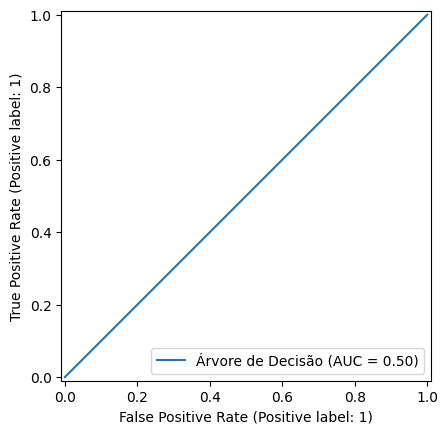

In [36]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão')

Quanto mais próximo de 1 melhor, e mais próximo de 0.5 pior AUC(Area Under the curve)

In [37]:
from sklearn.metrics import roc_auc_score

In [38]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5


##Curva de Precisão e Recall

In [39]:
from sklearn.metrics import PrecisionRecallDisplay

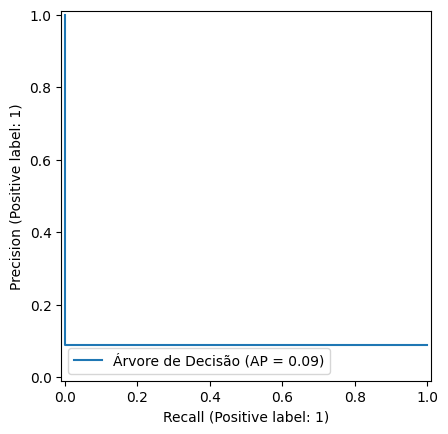

In [41]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão');

Quanto mais próximo de 0,0 pior. Quanto mais próximo de 1,1 melhor. AP = AVERAGE PRECISION
A curva de precisão x recall é melhor para avaliar dados que tem classes mais desbalanceadas.

In [42]:
from sklearn.metrics import average_precision_score

In [43]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.08727462764567546


##Relatório de Métricas


In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10479
           1       0.00      0.00      0.00      1002

    accuracy                           0.91     11481
   macro avg       0.46      0.50      0.48     11481
weighted avg       0.83      0.91      0.87     11481



O fato de possuirmos muito mais clientes adimplentes(10479) fez com que o modelo entendesse muito mais esse lado do que a variável alvo que buscamos (clientes inadimplentes - 1002).

##Usando o KFold

In [47]:
#Estratégia de validação cruzada, quanto mais partes melhor, porém mais poder de processamento necessário
from sklearn.model_selection import KFold, cross_validate


In [49]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x,y, cv = kf)
cv_resultados

{'fit_time': array([0.18849897, 0.20674634, 0.18590569, 0.18767595, 0.18821025]),
 'score_time': array([0.00285339, 0.00398397, 0.00267863, 0.00256896, 0.00278831]),
 'test_score': array([0.91355471, 0.90744774, 0.90788328, 0.91376307, 0.8997169 ])}

In [50]:
cv_resultados['test_score']

array([0.91355471, 0.90744774, 0.90788328, 0.91376307, 0.8997169 ])

In [51]:
media = cv_resultados['test_score'].mean()

In [52]:
desvio_padrao = cv_resultados['test_score'].std()

In [53]:
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8982017469784419, 0.9187445267711764]


##Validação cruzada com Recall

In [78]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [55]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x,y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.19449139, 0.24157119, 0.24781895, 0.23394394, 0.24081707]),
 'score_time': array([0.01661515, 0.006428  , 0.00576448, 0.00658703, 0.00726557]),
 'test_score': array([0.02377807, 0.0210396 , 0.0196802 , 0.01827676, 0.02427746])}

In [56]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.016782100282563404, 0.026038736175862873]


In [57]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.24054813, 0.18434954, 0.18325138, 0.2613759 , 0.3354075 ]),
 'score_time': array([0.00957584, 0.00895667, 0.00940108, 0.01308322, 0.01805663]),
 'test_accuracy': array([0.9127926 , 0.90755662, 0.90810105, 0.9135453 , 0.89906359]),
 'test_recall': array([0.02642008, 0.02227723, 0.0196802 , 0.0156658 , 0.02543353]),
 'test_precision': array([0.23809524, 0.23376623, 0.25396825, 0.23076923, 0.20754717]),
 'test_f1': array([0.04756243, 0.04067797, 0.03652968, 0.02933985, 0.04531411])}

In [59]:
def relatorio_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_padrao = resultados[metrica].std()
        print(f'Intervalo de confiança({metrica}): [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

In [60]:
relatorio_metricas(cv_resultados)

Intervalo de confiança(test_accuracy): [0.8978750533949732, 0.9185486054640589]
Intervalo de confiança(test_recall): [0.014054348080091613, 0.029736382376382896]
Intervalo de confiança(test_precision): [0.20291075853174056, 0.26274769203237036]
Intervalo de confiança(test_f1): [0.026876957746116627, 0.05289265610078079]


##Estratificando os dados

In [61]:
dados['inadimplente'].value_counts(normalize= True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [62]:
from sklearn.model_selection import StratifiedKFold

In [63]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x,y, cv = skf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.26506591, 0.36088872, 0.28572702, 0.43892694, 0.24839473]),
 'score_time': array([0.00643516, 0.00699759, 0.00589919, 0.00704241, 0.01407766]),
 'test_score': array([0.03740648, 0.02746567, 0.0286783 , 0.02493766, 0.02618454])}

In [64]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.020101199404477684, 0.037767860779021126]


In [65]:
def intervalo_conf(resultados, nome_modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confiança ({nome_modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [66]:
from sklearn.model_selection import cross_val_score, KFold

In [67]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.9025478639707798, 0.9228478108593472]
Intervalo de confiança (Random Forest): [0.9025478639707798, 0.9228478108593472]


In [68]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [69]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, x, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.0, 0.0]
Intervalo de confiança (Random Forest): [0.0, 0.0]


In [70]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [71]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arvore = cross_val_score(arvore, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Acurácia média (Decision Tree): {resultado_arvore.mean()}')
print(f'Acurácia média (Random Forest):{resultado_rf.mean()}')

KeyboardInterrupt: 

##Oversampling

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
oversample = SMOTE()
x_balanceado , y_balanceado = oversample.fit_resample(x,y)

In [74]:
y_balanceado.value_counts(normalize=True)

,proportion
inadimplente,
0,0.5
1,0.5


In [75]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado,y_balanceado, cv = skf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.39771295, 0.42524171, 0.40097952, 0.39574313, 0.39740777]),
 'score_time': array([0.0073216 , 0.00539255, 0.00543475, 0.00608778, 0.00544524]),
 'test_score': array([0.73252207, 0.72488666, 0.74412501, 0.73863772, 0.70913863])}

In [79]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7055024652039893, 0.7542215737970078]


Balanceamos os dados , mas isso não segue os dados do mundo real, mesmo melhorando o resultado do modelo

A estratégia de oversampling consiste em aumentar a quantidade de dados da classe que possui menor frequência até que tenha a mesma quantidade da classe de maior frequência. Dessa maneira, o modelo se atentará mais para o padrão dos dados da classe que tinha menor frequência a princípio e poderá diferenciar melhor as duas classes.

Para aumentar a quantidade de dados precisamos gerar novos registros na base de dados. É possível utilizar um oversampling aleatório para duplicar registros de maneira randômica ou usar uma técnica como o SMOTE para gerar dados sintéticos com um padrão próximo dos dados existentes. A desvantagem dessa estratégia é a possibilidade de overfitting do modelo, principalmente ao ser utilizado o oversampling aleatório. Nesse caso, o modelo pode se especializar demais no padrão dos dados que são muito parecidos ou idênticos, já que são copiados ou gerados sinteticamente.


A estratégia de undersampling é contrária ao oversampling, e consiste em reduzir a quantidade de dados da classe que possui maior frequência até que tenha a mesma quantidade da classe de menor frequência. Dessa forma, o modelo não dará atenção somente aos dados de maior quantidade e poderá diferenciar melhor as duas classes.

Para reduzir a quantidade de dados, precisamos remover ou deletar registros existentes. É possível utilizar um undersampling aleatório para selecionar os registros que serão mantidos ou usar técnicas que selecionam ou removem dados a partir de um padrão estabelecido. A principal desvantagem da estratégia de undersampling é a de remover dados que podem ser muito importantes para o entendimento do problema, principalmente quando essa remoção é feita sem nenhum critério, como é o caso do undersampling aleatório.

Ambas as estratégias são válidas para a tentativa de melhorar o desempenho de um modelo de classificação, mas devemos ficar atentos ao utilizá-las devido aos pontos negativos que são inerentes a cada um dos métodos. Em qualquer projeto que seja utilizado alguma dessas ferramentas, deve ser feita uma análise para identificar se de fato elas ajudaram ou atrapalharam o desempenho do modelo de classificação.




##Pipeline para validação

In [80]:
from imblearn.pipeline import Pipeline as imbpipeline

In [82]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [83]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [84]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.21733827945733125, 0.310979502865887]


o recall está melhorando nos dados reais

##Undersampling

In [85]:
from imblearn.under_sampling import NearMiss

In [87]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [89]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6225280536228474, 0.6949921284438337]


Melhor resultado

##Testando o Modelo

In [90]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [91]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

In [92]:
print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



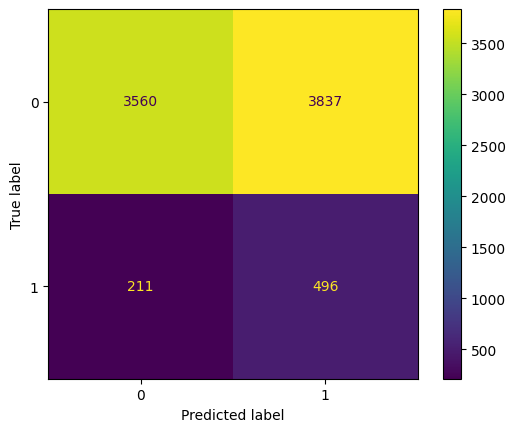

In [93]:
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

##Combinação das duas técnicas

In [94]:
from imblearn.combine import SMOTEENN

In [95]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arvore', modelo)])

In [96]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.28037110367511753, 0.4704771190888216]


Foi menos eficiente nesse caso , mas pode ser melhor em outros